# Wprowadzenie do pracy z pakietem Keras
**Autor**: Paweł Przestrzelski

**Na podstawie**: Chollet F. (2019) *Deep Learning. Praca z językiem Python i bilbioteką Keras*. Helion

***Keras*** jest biblioteką, która stanowi wysokopoziomowe API do pracy z sieciami neuronowymi. "Pod maską" może ona pracować zarówno za pomocą silnika TensorFlow, Theano, jak i CNTK. Domyślnie Keras będzie pracował z TensorFlow oraz jego biblioteką operacji tensorowych. ***Tesnor*** jest strukturą danych. Jest on uogólnieniem macierzy w przestrzeniach  o dowolnej liczbie wymiarów. W kontekście tensorów wymiary nazywamy osiami, a ich liczbę - rangą. Podczas pracy z uczeniem głębokim pracuje się z tensorami mającymi od 0 do 4 wymiarów. Przetwarzając dane wideo można napotkać również tensory pięciowymiarowe.

Na typowy przepływ pracy z pakietem Keras składaja się:

1. zdefiniowanie danych treningowych: tensory wejściowe i tensory wartości docelowych - ogólnie przygotowanie danych, w zależności od specyfiki zadania
2. zdefiniowanie warstw sieci (lub modelu) przypisując dane wejściowe do docelowych wartości
3. konfiguracja procesu uczenia: wybranie funkcji straty, optymalizatora i monitorowanie metryki - metoda *compile()*
4. wykonanie iteracji procesu uczenia na danych treningowych - metoda *fit()*
5. używanie wytrenowanej sieci do generowania przewidywań dotyczących nowych danych - metoda *predict()*

Punkt (2) można zrealizować dwojako: poprzez użycie klasy *Sequential*, ale tylko dla liniowych stosów warstw (obecnie najpopularniejsza architektura sieci) lub poprzez funkcjonalny interfejs API. Funkcjonalny, gdyż w tym wariancie przeprowadzasz operacje na tensorach danych przetwarzanych przez model - przetwarzasz tensory przez wartswy sieci tak, jakby były funkcjami.

## Przydatne linki:
* instalacja: https://keras.io/#installation
* klasa Sequential: https://keras.io/getting-started/sequential-model-guide/
  * warstwa Dense (gęsto połaczona): https://keras.io/layers/core/#dense
  * funkcje aktywacji: https://keras.io/layers/core/#activation
* kompilacja modelu: https://keras.io/models/model/#compile
  * optymalizatory: https://keras.io/optimizers/
  * funkcje straty: https://keras.io/losses/
  * metryki: https://keras.io/metrics/
* trenowanie sieci: https://keras.io/models/model/#fit
* ewaluacja modelu: https://keras.io/models/model/#evaluate
* predykcja: https://keras.io/models/model/#predict

## Przykład praktyczny

Zbiór danych IMDB obejmuje 50 000 spolaryzowanych (czyt. pozytywne lub negatywne) recenzji opublikowanych w serwisie Internet Movie Database. Podzielono je w stosunku 50/50 na zbiór treningowy i testowy. Każdy z nich składa się w połowie z recenzji pozytywnych i negatywnych.


In [ ]:
## (1) Przygotowanie danych
# Wczytywanie danych
from keras.datasets import imdb

# num_words=10000 - ograniczamy się do 10 000 słów najczęściej
# występujących w treningowym zbiorze danych. Umożliwi to pracę z wekorem danych
# o rozmiarze umożliwiającym jego przetwarzanie.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


In [ ]:
# Zmienne train_data i test_data są listami recenzji, każda jest listą indeksów
# słów (zakodowaną sekwencją słów). Zmienne train_labels i test_labels
# zawierają etykiet w postaci zer (recenzja negatywna) i jedynek (recenzja pozytywna)
print('Próbki danych:\n', train_data[0])
print('Etykiety:\n', train_labels[0])

Próbki danych:
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Etykiety:
 1


In [ ]:
# Ciekawostka: odkodowanie recenzji
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
print('Zdekodowana recenzja:\n', decoded_review)

Zdekodowana recenzja:
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they 

In [ ]:
# Listy wartości całkowitoliczbowych należy zamienić na listę tensorów, aby móc
# ją przekazać do sieci neuronowej.
# Zakodujemy listy tak, aby zmienić je w wektory zer i jedynek. Oznacza to, np.
# zamienienie sekwencji [3, 5] na wektor mający 10 000 wymiarów, który
# będzie wypełniony samymi zerami, a tylko pod indeksami o numerach 3 i 5
# znajdą się jedynki.

# Dla przejrzystości przykładu wykonamy to manualnie:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.  # pod wybranymi indeksami umieszcza wartość 1.

  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Wyświetlmy próbki po zmianach
print('Próbki po zmianach:\n', x_train)

# Zamieńmy jeszcze etykiety próbek na wektory
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print('Etykiety po zmianach:\n', y_train)

Próbki po zmianach:
 [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
Etykiety po zmianach:
 [1. 0. 0. ... 0. 1. 0.]


In [ ]:
## (2) Budowanie sieci neuronowej

# Sieć ma za zadanie zwracać wartości prawdopodobieństw przynależności
# recenzji do jednej z kategorii: pozytywnej (1) lub negatywnej (0).
from keras import models
from keras import layers

# Wykorzystamy dwie wartswy ukryte. Warstwę wejściową sieci stanowią
# sygnały wejściowe (dane), które wprowadzane są do neuronów, czyli
# pierwszej warstwy ukrytej.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # po zastosowaniu funkcji sigmoidalnej
                                                  # na wyjściu uzyskami wartości
                                                  # z zakresu <0; 1>

In [ ]:
## (3) Konfiguracja/Kompilowanie modelu

# Za optymalizator posłuży RMSprop
# Za funkcję straty najlepiej w naszym przypadku przyjąć binary_crossentropy,
# czyli funkcję binarnej entropii krzyżowej. Możemy tutaj użyć innych funkcji,
# ale entropia krzyżowa jest zwykle najlepszą opcją w przypadku modeli
# zwracających wartości prawdopodobieństw. Termin entropii krzyżowej wywodzi
# się z teorii informacji, jest to miara odległości pomiędzy rozkładami prawdo-
# podobieństwa, a w tym przypadku rozkładem prawdziwych wartości i rozkładem
# przewidywanych wartości.
# Podczas trenowania będziemy obserwować dokładność (ang. accuracy)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Czasami zachodzi konieczność skonfigurowania parametrów optymalizatora
# lub przekazania samodzielnie wykonanej funkcji straty lub funkcji metryki.
# Można to zrobić, przekazując instancję klasy optymalizator jako
# argument optimizer i przekazując funkcję obiektów jako argumenty
# loss i metrics:
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

In [ ]:
## (4) Trenowanie i walidacja modelu
# Tworzenie zbioru walidacyjnego
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Trenowanie modelu
# Będziemy trenować model przez 20 epok, czyli wykonamy 20 iteracji
# próbek znajdujących się w tesorach partial_x_train i partial_y_train
# z podziałem na wsady (ang. batch) po 512 próbek.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Podczas uczenia monitorować będziemy funkcję stray i dokładność
# modelu przy przetwarzaniu 10 000 próbek walidacyjnych, które zostały
# odłożone przed chwilą (validation_data).

# Wywołanie metody fit() zwraca obiekt History, który z kolei mieści
# element o nazwie history. Jest to słownik zawierający dane dotyczące
# przebiegu trenowania
history_dict = history.history
print(history_dict.keys())

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.5366 - accuracy: 0.7749 - val_loss: 0.4103 - val_accuracy: 0.8606
Epoch 2/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.3269 - accuracy: 0.8993 - val_loss: 0.3231 - val_accuracy: 0.8816
Epoch 3/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.2397 - accuracy: 0.9243 - val_loss: 0.3018 - val_accuracy: 0.8773
Epoch 4/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1838 - accuracy: 0.9430 - val_loss: 0.2744 - val_accuracy: 0.8894
Epoch 5/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1513 - accuracy: 0.9517 - val_loss: 0.2834 - val_accuracy: 0.8868
Epoch 6/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1267 - accuracy: 0.9582 - val_loss: 0.2880 - val_accuracy: 0.8875
Epoch 7/20
15000/15000 [==============================] - 2s 1

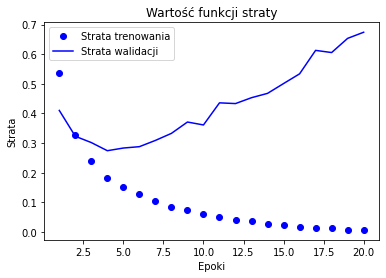

In [ ]:
# Wizualizacja efektu procesu uczenia sieci
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Wartość funkcji straty')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

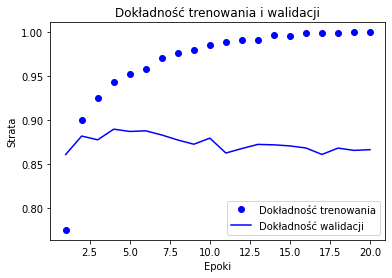

In [ ]:
plt.clf() # czyścimy wykres

plt.plot(epochs, acc, 'bo', label='Dokładność trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokładność walidacji')
plt.title('Dokładność trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

In [ ]:
# UWAGA!
# Przeglądając wyniki nauki sieci zauwazyć należy, iż strata trenowania spada
# z każdą kolejną iteracją, a dokładność wzrasta (wartości wykropkowane na
# obu wykresach). Tego oczekiwaliśmy! ALE w około czwartej epoce strata
# walidacji rośnie (choć oczekujemy, że będzie maleć), a dokładność walidacji
# spada. Oznacza to nadmierne dopasowanie modelu do danych uczących! Można
# tutaj zastosować różne techniki zapobiegające nadmiernemu dopasowaniu, ale
# na potrzeby przykładu liczba epok uczących zostanie po prostu ograniczona
# do 4-ech.

# Ponowne uczenie modelu, ale na pełnych danych treningowych
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# verbose=0 wyłącza kompletnie informacje nt procesu uczenia
model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=0)

In [ ]:
# Wykonajmy jeszcze ewaluację wyuczonego modelu
results = model.evaluate(x_test, y_test)
print('Dokładność wytrenowanego modelu:')
print('\tEtykiety: ', model.metrics_names)
print('\tWartości: ', results)

25000/25000 [==============================] - 2s 78us/step
Dokładność wytrenowanego modelu:
	Etykiety:  ['loss', 'accuracy']
	Wartości:  [0.3049865667629242, 0.8794800043106079]


In [ ]:
# (5) Praktyczne użycie wytrenowanego modelu
predictions = model.predict(x_test)
print(predictions)

[[0.17475373]
 [0.99986583]
 [0.8668706 ]
 ...
 [0.09412366]
 [0.06889611]
 [0.4108573 ]]


In [ ]:
# Jak widać powyżej sieć w niektórych przypadkach jest bardzo
# pewna swoich osądów (wartości zbliżone do ~1 lub ~0), ale w niektórych
# przypadkach są to wartości ~ 0.5.

In [ ]:
## DALSZE EKSPERYMENTY:
# + W modelu korzystano z dwóch warstw ukrytych. Dodaj 1 lub 3 wartswy ukryte
#   i zweryfikuj dokładność działania sieci
# + Zmień wartość jednostek w warstwach ukrytych (np. 32 lub 64)
# + Zmień funkcję straty na mse
# + Zastąp relu funkcją tanh
# + Wykorzystaj techniki redukujące nadmierne dopasowanie sieci do danych
#   uczących, np. redukcja rozmiaru sieci, regularyzacja wag, technika dropout.